In [7]:
#importing dependencies for data wrangling
import pandas as pd
import numpy as np

In [25]:
# importing data for data visualization
import matplotlib.pyplot as plt
from mglearn.plot_helpers import  cm2

In [32]:
# importing machine learning modules
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split

Linear Regression

### Creating a synthetic dataset using sklearn for Linear Regression

##### This function will generate synthetic data for us to use further down the line for building our regression model. We will use a scatterplot for visualization

In [5]:
def make_wave(n_samples=100):
    # generating the data 
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4*x)+x)
    y = (y_no_noise + rnd.normal(size=len(x)))/2

    return x.reshape(-1,1), y

In [12]:
X, y = make_wave(60)

##### Analysis and visualization

In [13]:
df_x = pd.DataFrame(X)
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       60 non-null     float64
dtypes: float64(1)
memory usage: 612.0 bytes


In [14]:
df_y = pd.DataFrame(y)
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       60 non-null     float64
dtypes: float64(1)
memory usage: 612.0 bytes


###### we observe there are two variable for a feature and target valuse

X.shape: (60, 1)


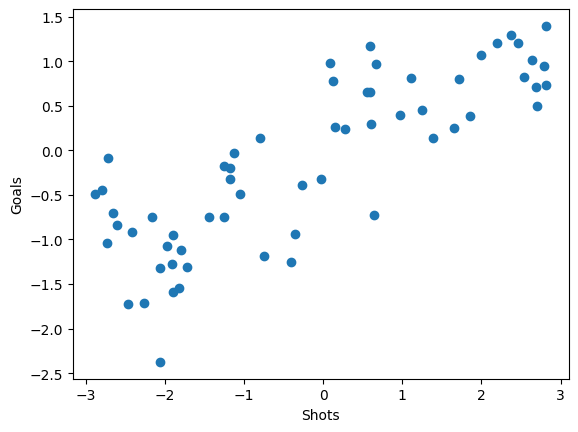

In [15]:
plt.plot(X, y, 'o')
plt.xlabel("Shots")
plt.ylabel("Goals")
print("X.shape: {}". format(X.shape))

###### From the visualiztion we can observe the points follow a specific pattern we can be sure that as as the number of the shots increases the goals will also increase

### Applying the linear regression algorithm 

In [35]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [36]:
# Initializing the model to 3 neighbors
lr = LinearRegression()

In [37]:
#Fitting the model with data
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
# Making predictions
print("Test set predictions: {}". format(lr.predict(X_test)))

Test set predictions: [-0.81274146  0.79990117 -0.47984962  0.22771528  1.22778333  0.59749174
  1.21645044 -1.2219042  -1.01841511 -0.5677658  -0.92839354 -1.28718838
  0.26779873 -0.02988867  1.17208529]


In [48]:
# Calculating accuracy
print("Test set R^2: {:.2f}".format(lr.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(ridge.score(X_train, y_train)))

Test set R^2: 0.69
Training set R^2: 0.66


###### We can observe that the r squared value of the model is 0.69

### Visualizing the predictions

In [29]:
def plot_knn_regression(n=1):
    line = np.linspace(-3, 3, 100).reshape(-1, 1)
    # print("w[0]: %f b: %f" % (lr.coef_, lr.intercept_))

    plt.figure(figsize=(8,8))
    plt.plot(line, lr.predict(line))
    plt.plot(X, y, 'o', c=cm2(0))
    ax = plt.gca()
    
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    
    ax.set_ylim(-3, 3)
    ax.legend(["model", "training data"], loc="best")
    ax.grid(True)
    ax.set_aspect('equal')

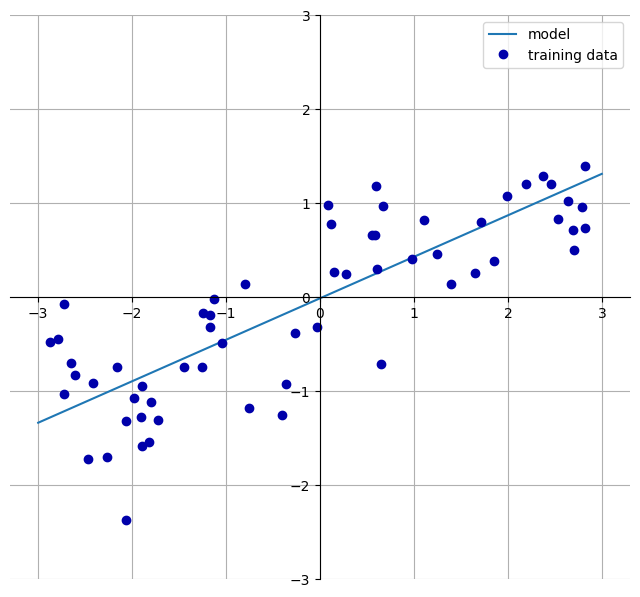

In [30]:
plot_knn_regression()

- ##### From the above graph we observe that the line of regresion cuts through the datapoint in order to maintain a least square 

### Ridge Regression 

-  ##### Ridge regression is similar to linear regression 
-  ##### The only difference is that the weight are calculated by generalization
-  ##### This means that bringing most values to as close as possible to zero so that they don't affect the model significantly
-  ##### Ridge regression uses L2 regularization

#### Applying the ridge regression algorithm 

In [43]:
# Initializing the model to 3 neighbors
ridge = Ridge()

In [45]:
#Fitting the model with data
ridge.fit(X_train, y_train)

Ridge()

In [46]:
# Making predictions
print("Test set predictions: {}". format(ridge.predict(X_test)))

Test set predictions: [-0.80774738  0.79328599 -0.477252    0.22521921  1.21808786  0.59233369
  1.20683656 -1.21396459 -1.0119404  -0.56453527 -0.92256689 -1.2787788
  0.2650141  -0.03053027  1.16279079]


In [47]:
# Calculating accuracy
print("Test set R^2: {:.2f}".format(ridge.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(ridge.score(X_train, y_train)))

Test set R^2: 0.70
Training set R^2: 0.66


-  ##### The training set score of the ridge is less than linear regression while the test score is higher
-  ##### That means the model generalises better on new data
-  ##### This is the type of behaviour we want for our model 

#### Visualizing the ridge regression algorithm 

In [54]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(ridge10.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(ridge10.score(X_train, y_train)))

Test set R^2: 0.71
Training set R^2: 0.66


-  ##### Increaing the alpha forces coefficients towards zero, this decreases training set score but helps with generalization

In [53]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(ridge01.score(X_test, y_test)))
print("Training set R^2: {:.2f}".format(ridge01.score(X_train, y_train)))

Test set R^2: 0.69
Training set R^2: 0.66


- ##### Decreasing the alpha allows the coefficients to be less restricted
- ##### An even lower alpha will lead us to linear regression

(-25.0, 25.0)

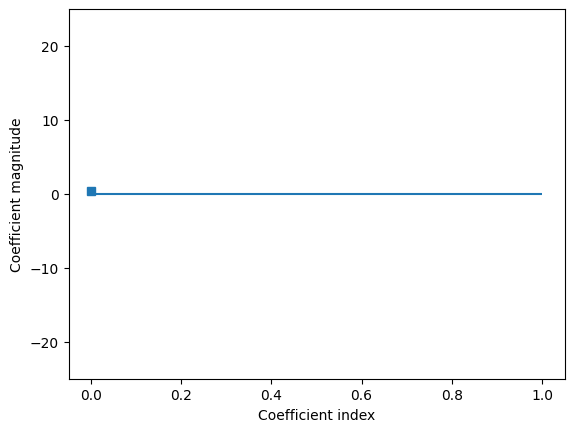

In [61]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)

In [63]:
ridge10.coef_

array([0.41168494])